# Lab2: Multiple Linear Regression

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import statsmodels.api as sm
import scipy as sp
%matplotlib inline

/Users/dsondak/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the miles-per-gallon(mpg) of an automobile (response variable) using its attributes (predictor variables).


### Data and Models as Matrices (Arrays)

What are the type of objects that regression models we have seen so far work with?

![](images/sklearnform.png)

Note that $X$ is a two dimensional array with shape (3, 2) and $Y$ is a one dimensional array with shape (3, ) (or (3, 1) as a trivial two dimensional array). 

We need to turn models (functional forms) into arrays and matrices. 

$$
\begin{align}
  \underbrace{\hat{Y} = f(X_1, X_2) = 2X_1 - X_2}_{Model} \longrightarrow X
\end{align}$$

Note that the model $M$ is a one dimensional array with shape (2, ) (or (2, 1) as a trivial two dimensional array). Also note that this is not the best-fit regression model, just an arbitrary model we are trying out.

$$
\begin{array}{cc}
\text{Coef. for $X_1$ }&  2\\
\text{Coef. for $X_2$ }& -1\\
\end{array}
$$

$$M= \left(\begin{array}{c}
2\\
-1\\
\end{array}\right)$$

We need to phrase the prediction task - applying $f(X_1, X_2) = 2X_1 - X_2$ to the data - in terms of matrix operations.

![](images/matmult.png)

Finally notice that we have not included any intercept here

### Linear Regression Formula

We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{equation*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{equation*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data is not collinear.  Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.


Suspending reality, suppose there is a line $\beta_0 + \beta_1 x = y$ that passes through all three observations.  Then we'd solve

\begin{eqnarray}
\beta_0 + \beta_1 &=& 2 \nonumber \\
\beta_0 + 2 \beta_1 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 &=& 4, \nonumber \\
\end{eqnarray}


for  $\beta_0$ and  $\beta_1$, the intercept and slope of the desired line.  Let's write these equations in matrix form.  The left hand sides of the above equations can be written as

![?](images/LHS.png)

while the right hand side is simply the vector

\begin{equation*}Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}. \end{equation*}

Thus we have the matrix equation $X \beta = Y$ where

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 
\end{pmatrix}, \quad \mathrm{and} 
\quad Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}.
\end{equation}

To find the best possible solution to this linear system that has no solution, we need to solve the *normal equations*, or

\begin{equation}
X^T X \beta = X^T Y.
\end{equation}

If $X^T X$ is invertible then the solution is

\begin{equation}
\beta = (X^T X)^{-1} X^T Y.
\end{equation}

### What if there were two predictors?

The $X$ matrix and vector $\beta$ change.  In this case adding a second predictor variable would result in adding a third column to the $X$ matrix, so that the matrix is $3 \times 3$.  A third variable would be added to the $\beta$ vector.  Note that we need to be consistent in appending rows and columns to the matrix $X$ and the vector $\beta$.  For example, if the new predictor column is 

\begin{equation}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}, 
\end{equation}

and we include it in the $X$ matrix as

\begin{equation}
X = \begin{bmatrix}
1 & 1 & v_1\\
1 & 2 & v_2\\
1 & 3 & v_3
\end{bmatrix},
\end{equation}
then the corresponding $\beta$ vector is

\begin{equation}
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix}.
\end{equation}


Thus the linear system in matrix form is still $X \beta = Y$, 

\begin{equation}
\begin{bmatrix}
1 & 1 & v_1\\
1 & 2 & v_2\\
1 & 3 & v_3
\end{bmatrix} \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix} = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}, 
\end{equation}

which can be expanded as (via matrix multiplication as discussed during lab)


\begin{eqnarray}
\beta_0 + \beta_1 + v_1 \beta_2&=& 2 \nonumber \\
\beta_0 + 2 \beta_1 + v_2 \beta_2 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 + v_3 \beta_2&=& 4. \nonumber \\
\end{eqnarray}

Everything else remains the same.  

Does the addition of a third column changes the invertibility of $X^T X$.  The answer is that it depends on the particular values of $v_1, v_2$, and $v_3$.  For example, if $v_1 = v_2 = v_3 = 1$, then  $X^T X$ is not invertible.  If $v_1 = v_2 = 1$ and $v_3 = 4$, then $X^T X$ is invertible.  You check this directly by writing some code yourself (find the determinant!).  In the code we've used the determinant of $X^T X$ to check for invertibility.  That is, $X^T X$ is invertible if and only if $\det(X^T X) \ne 0$.  

*(You can be fancier about this if you like by using the properties of determinants, in the case when $X$ is a square matrix. $\det X^T X = \det X^T \det X = \det X \det X = (\det X)^2$, and since $\det X = 0$ in the first example, $\det X^T X = 0$ and hence is not invertible.  For the first example with $v_1 = v_2 = v_3 = 1$ we can see by inspection that $X$ is not invertible since the third column of $X$ is a constant multiple of the first column, ie, the  columns of $X$ do not form a linearly independent set.)*

## Multiple Linear Regression Fit

Ok so lets write this in code

``multiple_linear_regression_fit``:

- takes as input: the training set, ``x_train``, ``y_train``
- fits a multiple linear regression model
- returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

In [2]:
""" multiple_linear_regression_fit

A function for fitting a multiple linear regression
with n responses and d predictors

Fitted model: f(x) = x.w + c

Input: 
     x_train (n x d array of predictors in training data)
     y_train (n x 1 array of response variable vals in training data)
Return: 
     w (d x 1 array of coefficients) 
     c (float representing intercept)
"""

def multiple_linear_regression_fit(x_train, y_train):
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

### Score

``multiple_linear_regression_score``:

- takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs
- returns the $R^2$ score for the model on the test set, along with the predicted y-values.

In [3]:
"""multiple_linear_regression_score

A function for evaluating R^2 score and MSE 
of the linear regression model on a data set
with n observations and d predictors

Input: 
     w (d x 1 array of coefficients)
     c (float representing intercept)
     x_test (n x d array of predictors in testing data)
     y_test (n x 1 array of response variable vals in testing data)
     
Return: 
     r_squared (float) 
     y_pred (n x 1 array of predicted y-vals)
"""

def multiple_linear_regression_score(w, c, x_test, y_test):
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

### Test your functions

We've provided some code below to test our functions. We'll assume  "perfect" data generated from the line:

$$f(x) = 4x + 5$$

In [4]:
f = lambda x : 4*x + 5
testx_flat = np.arange(10)
testy = f(testx_flat)
testx = testx_flat.reshape(-1,1)

Here is the generated data

In [5]:
testx, testy

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]), array([ 5,  9, 13, 17, 21, 25, 29, 33, 37, 41]))

Now test your two functions. Is the output what you expect?

In [6]:
multiple_linear_regression_fit(testx, testy)

(array([4.]), 4.999999999999999)

In [7]:
multiple_linear_regression_score([4], 5, testx, testy)

(1.0, array([ 5,  9, 13, 17, 21, 25, 29, 33, 37, 41]))

### Loading the mtcars data

Use your functions to predict automobile mpg and evaluate your predictions. We'll use `wt` and `hp` as predictors for now.


In [8]:
dfcars=pd.read_csv("data/mtcars_lab2.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We check the shape and dtypes of our data to make sure they make sense, and to get the measure of the `small` data we are dealing with.

In [9]:
dfcars.shape

(32, 12)

In [10]:
dfcars.dtypes

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

We create a training and testing dataframe. . Notice how we used the dataframe itself..this is because pandas dataframes implement python's  *array* interface, and thus anything done to an array can be done to them.

In [11]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(dfcars)

We see the shapes of our training and testing sets.

In [12]:
traindf.shape, testdf.shape

((24, 12), (8, 12))

### One-Two-Three  Go!

We assign training and test $x$ and $y$ based on the respective dataframes. Notice how we use pandas dataframes and series

In [13]:
# Split predictors from response
# Training
y_train = traindf.mpg
x_train = traindf[['wt', 'hp']]

# Testing
y_test = testdf.mpg
x_test = testdf[['wt', 'hp']]

> YOUR TURN NOW
>Fit the training data and calculate the `r_squared` on the test set. Store the list of coefficients in `w` and the intercept in `c`.

In [14]:
# your code here.
# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

We print the $R^2$ out...

In [15]:
print('R^2 score on test set:', r_squared)

R^2 score on test set: 0.8432312022459421


We run this on the training set as well..

In [16]:
r_squared_train, _ = multiple_linear_regression_score(w, c, x_train, y_train)

print('R^2 score on train set:', r_squared_train)

R^2 score on train set: 0.7974936638882549


### Now try with sklearn

Lets do the same process with sklearn. We provide here the code for you.

In [17]:
#import linear model
from sklearn.linear_model import LinearRegression

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(x_train, y_train)

#predict y-values
predicted_y = regression.predict(x_test)

#score predictions (sklearn gives you R^2 as well)
r = regression.score(x_test, y_test)
r

0.8432312022459361

## Now try with statsmodels

Statsmodels procides a more R-like, or statisticsy interface which will illustrate a lot of the concepts we discussed in the second lecture.

Its interface is fifferent from sklearn in that you need to add a column of 1's explicitly.

In [18]:
# Add column of ones to x matrix
xtrain_vals = sm.add_constant(x_train.values)
ytrain_vals = y_train.values
# Create model for linear regression
model = sm.OLS(ytrain_vals, xtrain_vals)
# Fit model
fitted_model = model.fit()

In [19]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     41.35
Date:                Sat, 19 May 2018   Prob (F-statistic):           5.22e-08
Time:                        21:26:17   Log-Likelihood:                -54.525
No. Observations:                  24   AIC:                             115.0
Df Residuals:                      21   BIC:                             118.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3409      1.981     18.348      0.000      32.222      40.460
x1            -3.9253      0.719     -5.456      0.000      -5.422      -2.429
x2            -0.0265      0.010     -2.755      0.012      -0.047      -0.006
==============================================================================
Omnibus:                        8.448   Durbin-Watson:                   2.444
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.255
Skew:                           1.102   Prob(JB):                       0.0438
Kurtosis:                       4.183   Cond. No.                         669.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*From the R-cookbook*:

>...theoretically, if a variable’s coefficient is zero then the variable is worthless; it adds nothing to the model. Yet the coefficients shown here are only estimates, and they will never be exactly zero. We therefore ask: Statistically speaking, how likely is it that the true coefficient is zero? That is the purpose of the t statistics and the p-values, which in the summary are labeled (respectively) t value and Pr(>|t|).
The p-value is a probability. It gauges the likelihood that the coefficient is not significant, so smaller is better. Big is bad because it indicates a high likelihood of insignificance. In this example, the p-value for the u coefficient is a mere 0.00106, so u is likely significant....Variables with large p-values are candidates for elimination.

>$R^2 $is a measure of the model’s quality. Bigger is better. Mathematically, it is the fraction of the variance of y that is explained by the regression model. The remain- ing variance is not explained by the model, so it must be due to other factors (i.e., unknown variables or sampling variability).... That being said, I strongly suggest using the adjusted rather than the basic $R^2$. The adjusted value accounts for the number of variables in your model and so is a more realistic assessment of its effectiveness. 

>The F statistic tells you whether the model is significant or insignificant. The model is significant if any of the coefficients are nonzero (i.e., if βi ≠ 0 for some i). It is insignificant if all coefficients are zero (β1 = β2 = ... = βn = 0).

>Conventionally, a p-value of less than 0.05 indicates that the model is likely significant (one or more βi are nonzero) whereas values exceeding 0.05 indicate that the model is likely not significant. 

>Most people look at the $R^2$ statistic first. The statistician wisely starts with the F statistic, for if the model is not significant then nothing else matters.

> YOUR TURN NOW

>Notice the t-values and the p values (P > |t|) corresponding to those t-values. Are the coefficients of x1 and x2 statistically significant?

---

*your answer here*


> YOUR TURN NOW

>Notice that statsmodels also gives us the confidence intervals correspnding to 5%, with 2.5% on each side. Which of the x1 and x2 coefficients seems more significant?


*your answer here*


Finally notice the F-statistic. What does it tell us about the model?

## Confidence interval on regression parameters

Using your linear regression implementation from above model, you can compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set (with replacement) of size 10, size 18, and then of size 24 (your training data set size), and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: we will plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Think about how these compare to the confidence intervals you get from `statsmodels`.

### Do by Bootstrap

In [20]:
num_samples = 200 #number of subsamples we will use
d=2 #since we are fitting 2 parameters in addition to the intercept
n=x_train.shape[0] #the sample size in each subsample

We will write a function `do_bootstrap` which:

- takes as an argument the `subsample_size`, and creates `num_samples` samples

> YOUR TURN HERE

>Complete the function to 
- carry out the regression on each one of the samples
- returns a `(num_samples x  d)` size array of computed coefficients from the `num_samples` regressions

In [21]:
def do_bootstrap(subsample_size):
    coefs_multiple = np.zeros((num_samples, d))
    for i in range(num_samples):
        perm = np.random.choice(range(n), size=subsample_size, replace=True) 
        
        x_subsample = x_train.values[perm, :] 
        y_subsample = y_train.values[perm]
        # your code here
        # Fit linear regression model on subsample
        w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
        # Store the coefficient for the model we obtain
        coefs_multiple[i, :] = w
    return coefs_multiple

We provide a function to plot the confidence intervals for the coefficients from the output of the bootstrap function above.

In [22]:
def plot_ci(coefs_multiple):
    with sns.plotting_context('poster'):
        fig, axes = plt.subplots(1, d)#, figsize=(20, 8))

        # Repeat for each coefficient
        for j in range(d):
            # Compute mean for the j-th coefficent from subsamples
            coef_j_mean = np.mean(coefs_multiple[:, j])

            # Compute confidence interval at 95% confidence level (use formula!)
            conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
            conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)

            # Plot histogram of coefficient values
            axes[j].hist(coefs_multiple[:, j], alpha=0.5)

            # Plot vertical lines at mean and left, right extremes of confidence interval
            axes[j].axvline(x = coef_j_mean, linewidth=3)
            axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
            axes[j].axvline(x = conf_int_right, linewidth=1, c='r')

            # Set plot labels
            axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                              + ', ' 
                              + str(round(conf_int_right, 4)) + ']')
            axes[j].set_xlabel('Predictor ' + str(j + 1))
            axes[j].set_ylabel('Frequency')



> YOUR TURN NOW

>Do the bootstrap for size 10, size 18 and size 24. What trend do you see as the sample size increases

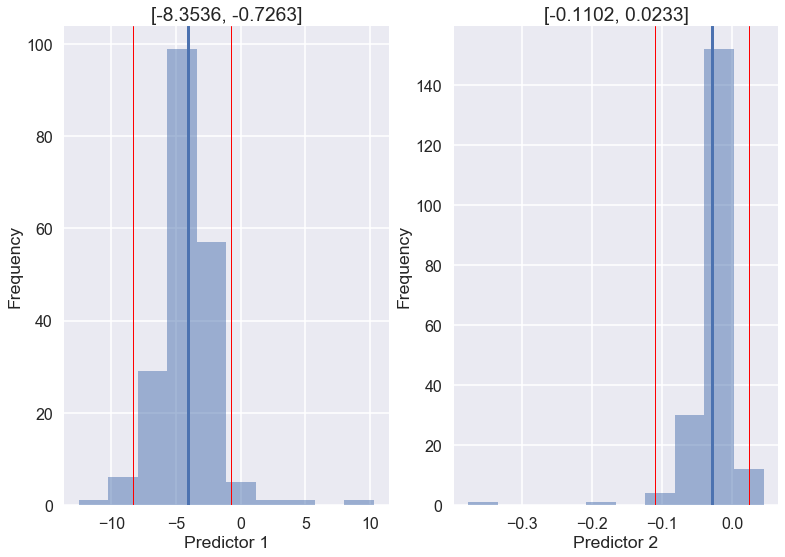

In [23]:
coefs_multiple = do_bootstrap(10)
plot_ci(coefs_multiple)

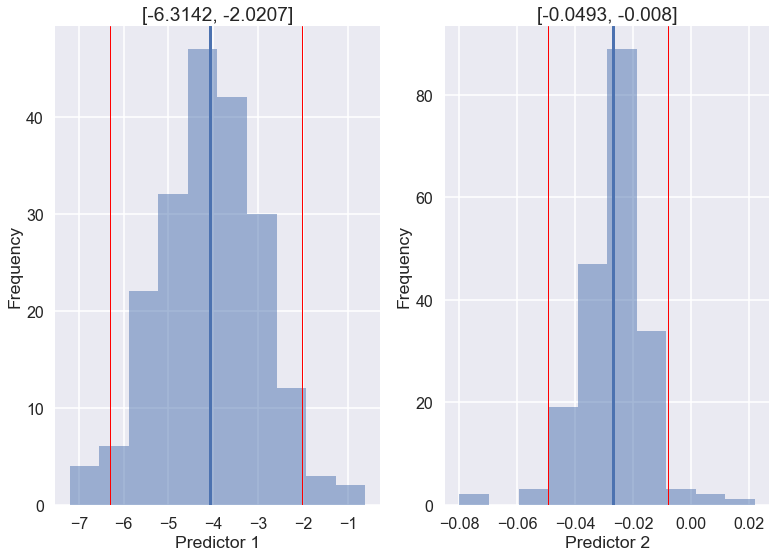

In [24]:

coefs_multiple = do_bootstrap(18)
plot_ci(coefs_multiple)

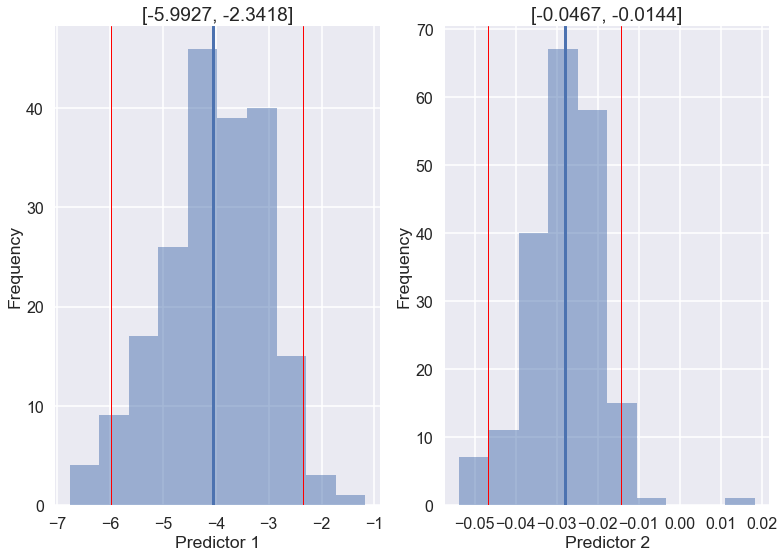

In [25]:
coefs_multiple = do_bootstrap(24)
plot_ci(coefs_multiple)

*your answer here*
